In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rie_estimator
import csestimator

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
european_returns = pd.read_csv('/home/dum/Desktop/data/european_market_returns.csv', index_col = "Date")
american_returns = pd.read_csv('/home/dum/Desktop/data/sp_500_returns.csv', index_col = "Date")

In [4]:
norm_european_returns = (european_returns -european_returns.mean()) / european_returns.std()
norm_american_returns = (american_returns -american_returns.mean()) / american_returns.std()

In [5]:
samp_corr_european = european_returns.corr()
samp_corr_american = american_returns.corr()

In [6]:
rie_est_american = rie_estimator.get_rie(norm_american_returns)
rie_est_european = rie_estimator.get_rie(norm_european_returns)

In [8]:
shrink_estimator_european_5 = csestimator.get_shrinkage_est(norm_european_returns, 0.5)
shrink_estimator_american_5 = csestimator.get_shrinkage_est(norm_american_returns, 0.5)
shrink_estimator_european_2 = csestimator.get_shrinkage_est(norm_european_returns, 0.2)
shrink_estimator_american_2 = csestimator.get_shrinkage_est(norm_american_returns, 0.2)
shrink_estimator_european_1 = csestimator.get_shrinkage_est(norm_european_returns, 1)
shrink_estimator_american_1 = csestimator.get_shrinkage_est(norm_american_returns, 1)

In [9]:
samp_corr_european_norm = norm_european_returns.corr()
samp_corr_american_norm = norm_american_returns.corr()

Calcular la distancia entre rie y correlacion muestral:

In [20]:
print(np.linalg.norm(((samp_corr_american - rie_est_american).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_5).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_2).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_american - shrink_estimator_american_1).values), ord = "fro"))
print(np.linalg.norm(((rie_est_american - shrink_estimator_american_5)), ord = "fro"))

1.744187202289665
42.57245954005978
17.028983816023903
85.14491908011956
42.34195826204095


In [21]:
print(np.linalg.norm(((samp_corr_european - rie_est_european).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_5).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_2).values), ord = "fro"))
print(np.linalg.norm(((samp_corr_european - shrink_estimator_european_1).values), ord = "fro"))
print(np.linalg.norm(((rie_est_european - shrink_estimator_european_5)), ord = "fro"))

1.0437686980867973
22.85671786890538
9.142687147562144
45.71343573781078
22.676533033529175


In [24]:
eigenval_sample_american, eigenvec_sample_american = np.linalg.eig(samp_corr_american.values)
eigenval_rie_american, eigenvec_rie_american = np.linalg.eig(rie_est_american)
eigenval_shrink_american, eigenvec_shrink_american = np.linalg.eig(shrink_estimator_american_5)

In [26]:
eigenval_sample_american.sort()
eigenval_rie_american.sort()
eigenval_shrink_american.sort()

In [40]:
eigenval_sample_european, eigenvec_sample_european = np.linalg.eig(samp_corr_european.values)
eigenval_rie_european, eigenvec_rie_european = np.linalg.eig(rie_est_european)
eigenval_shrink_european, eigenvec_shrink_european = np.linalg.eig(shrink_estimator_european_5)
eigenval_sample_european.sort()
eigenval_rie_european.sort()
eigenval_shrink_european.sort()

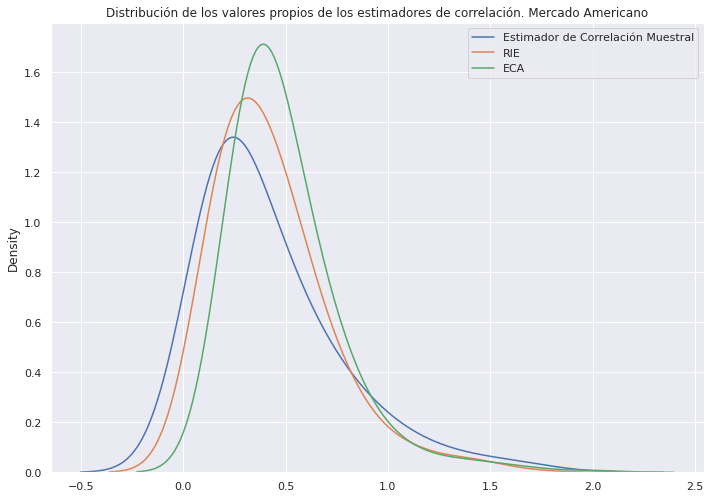

In [39]:
#sns.histplot(data = eigenval_sample_american[:400], stat = "density", element = "step", fill = False, label="GOE")
sns.kdeplot(eigenval_sample_american[:440], bw_method=0.5, fill=False, alpha = 1)
sns.kdeplot(eigenval_rie_american[:440], bw_method=0.5, fill=False, alpha = 1)
sns.kdeplot(eigenval_shrink_american[:440], bw_method=0.5, fill=False, alpha = 1)
plt.legend(labels=['Estimador de Correlación Muestral', 'RIE', 'ECA'])
plt.title("Distribución de los valores propios de los estimadores de correlación. Mercado Americano")
plt.show()

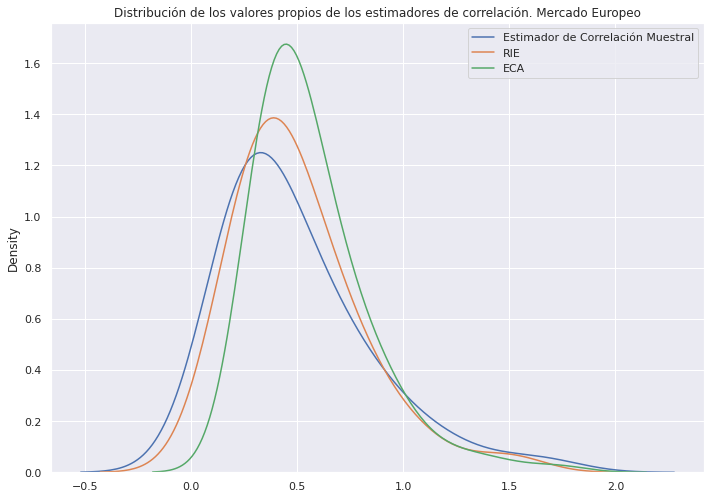

In [55]:
#sns.histplot(data = eigenval_sample_european[:400], stat = "density", element = "step", fill = False, label="GOE")
sns.kdeplot(eigenval_sample_european[:260], bw_method=0.5, fill=False, alpha = 1)
sns.kdeplot(eigenval_rie_european[:260], bw_method=0.5, fill=False, alpha = 1)
sns.kdeplot(eigenval_shrink_european[:260], bw_method=0.5, fill=False, alpha = 1)
plt.legend(labels=['Estimador de Correlación Muestral', 'RIE', 'ECA'])
plt.title("Distribución de los valores propios de los estimadores de correlación. Mercado Europeo")
plt.show()

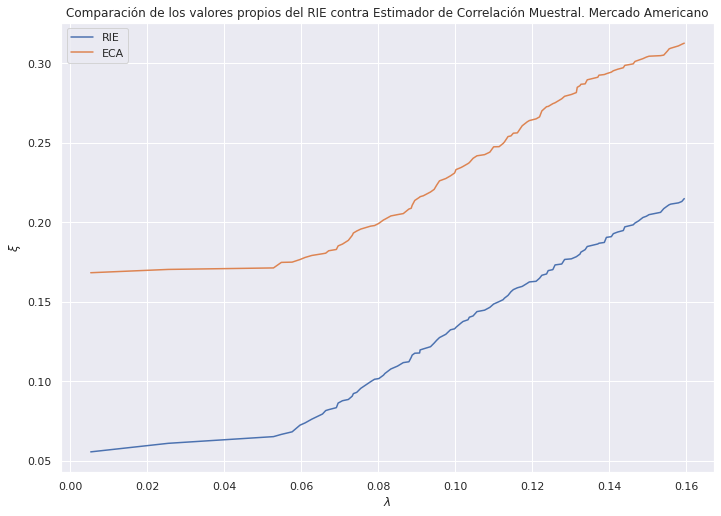

In [53]:
ax = sns.lineplot(x = eigenval_sample_american[:100], y = eigenval_rie_american[:100])
ax = sns.lineplot(x = eigenval_sample_american[:100], y = eigenval_shrink_american[:100])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Americano")
plt.legend(labels=['RIE', 'ECA'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()


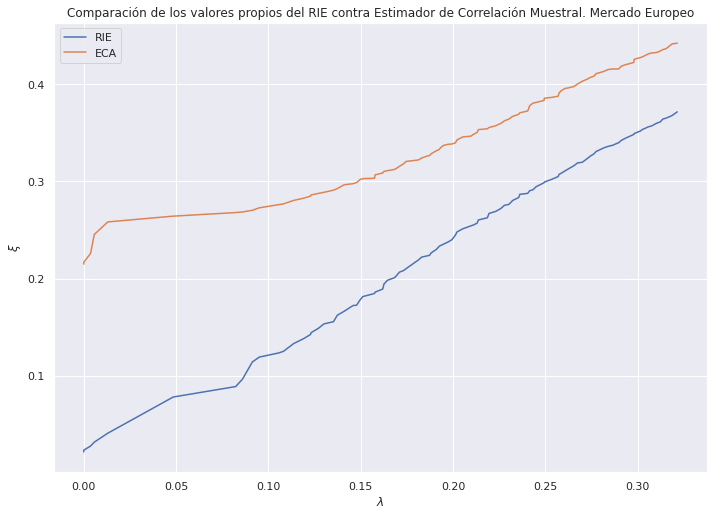

In [54]:
ax = sns.lineplot(x = eigenval_sample_european[:100], y = eigenval_rie_european[:100])
ax = sns.lineplot(x = eigenval_sample_european[:100], y = eigenval_shrink_european[:100])
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral. Mercado Europeo")
plt.legend(labels=['RIE', 'ECA'])
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
plt.show()
